### Functionalizing

- Funtional API로 모델 만들기
- pixel값 1 ~ 255를 0 ~ 1 사이 값 Float32로 만들기
- One Hot Encoding Label에 적용하기
- 학습과 검증 데이터로 나누기
- compile, 학습/예측/평가

In [1]:
import os 
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"]="6"

In [2]:
import numpy as np
from tensorflow.keras.utils import to_categorical 
from sklearn.model_selection import train_test_split

from tensorflow.keras.layers import Layer, Input,Dense,Flatten 
from tensorflow.keras.models import Model 
import tensorflow as tf



2021-11-15 23:28:59.533121: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-11-15 23:28:59.533153: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [3]:
INPUT_SIZE=28
def create_model():
    
    input_tensor=Input(shape=(INPUT_SIZE,INPUT_SIZE))
    x = Flatten()(input_tensor)
    x = Dense(100, activation='relu')(x)
    x = Dense(30,activation='relu')(x)
    output = Dense(10,activation='softmax')(x)

    model = Model(inputs=input_tensor,outputs = output)

    return model

model = create_model()
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28)]          0         
_________________________________________________________________
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 100)               78500     
_________________________________________________________________
dense_1 (Dense)              (None, 30)                3030      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                310       
Total params: 81,840
Trainable params: 81,840
Non-trainable params: 0
_________________________________________________________________


2021-11-15 23:29:00.798996: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-11-15 23:29:00.799044: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2021-11-15 23:29:00.799082: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory
2021-11-15 23:29:00.800693: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcusolver.so.11'; dlerror: libcusolver.so.11: cannot open shared object file: No such file or directory
2021-11-15 23:29:00.800731: W tensorflow/stream_executor/platform/default/dso_loader

In [4]:
# 0 ~ 1사이값의 float32로 변경하는 함수

def get_preprocessed_data(images,labels):
    images = np.array(images/255.0,dtype=np.float32)
    labels = np.array(labels,dtype = np.float32)

    return images,labels


# 0 ~ 1사이값 float32로 변경하는 함수 호출 한 뒤 OHE 적용

def get_preprocessed_ohe(images,labels):
    images,labels=get_preprocessed_data(images,labels)

    oh_labels = to_categorical(labels)

    return images,oh_labels


# 학습/검증/테스트 데이터 세트에 전처리 및 OHE 적용한 뒤 반환 

def get_train_valid_test_set(train_images,train_labels,test_images,test_labels,valid_size=0.15,random_state=2021):
    
    train_images,train_oh_labels = get_preprocessed_ohe(train_images,train_labels)
    test_images,test_oh_labels = get_preprocessed_ohe(test_images,test_labels)

    #검증 데이터
    tr_images,val_images,tr_oh_labels,val_oh_labels = train_test_split(train_images,train_oh_labels,test_size=valid_size,random_state=random_state)

    return (tr_images,tr_oh_labels),(val_images,val_oh_labels),(test_images,test_oh_labels)
    



#### Fashion MNIST 데이터 재로딩 및 전처리 적용하여 학습/검증/데이터 셋 생성

In [5]:
from tensorflow.keras.datasets import fashion_mnist

(train_images,train_labels),(test_images,test_labels) = fashion_mnist.load_data()

print(train_images.shape,train_labels.shape,test_images.shape,test_labels.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [6]:
(tr_images,tr_oh_labels),(val_images,val_oh_labels),(test_images,test_oh_labels)= get_train_valid_test_set(train_images,train_labels,test_images,test_labels,valid_size=0.15,random_state=2021)

In [7]:
print(tr_images.shape,tr_oh_labels.shape,val_images.shape,val_oh_labels.shape,test_images.shape,test_labels.shape)

(51000, 28, 28) (51000, 10) (9000, 28, 28) (9000, 10) (10000, 28, 28) (10000,)


In [8]:
from tensorflow.keras.optimizers import Adam 

#Model 생성 및 optimizer, loss, metric 적용
model = create_model()
model.summary()


model.compile(optimizer=Adam(0.001),loss='categorical_crossentropy',metrics=['accuracy'] )


Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 28, 28)]          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_4 (Dense)              (None, 30)                3030      
_________________________________________________________________
dense_5 (Dense)              (None, 10)                310       
Total params: 81,840
Trainable params: 81,840
Non-trainable params: 0
_________________________________________________________________


In [9]:
#학습 수행

history = model.fit(x=tr_images,y=tr_oh_labels,batch_size=128,epochs=20,validation_data=(val_images,val_oh_labels))

2021-11-15 23:29:02.201343: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/20
399/399 [==============================] - 2s 4ms/step - loss: 0.6061 - accuracy: 0.7948 - val_loss: 0.4626 - val_accuracy: 0.8323
Epoch 2/20
399/399 [==============================] - 1s 3ms/step - loss: 0.4127 - accuracy: 0.8544 - val_loss: 0.4019 - val_accuracy: 0.8588
Epoch 3/20
399/399 [==============================] - 1s 3ms/step - loss: 0.3730 - accuracy: 0.8685 - val_loss: 0.4105 - val_accuracy: 0.8526
Epoch 4/20
399/399 [==============================] - 1s 3ms/step - loss: 0.3465 - accuracy: 0.8764 - val_loss: 0.3879 - val_accuracy: 0.8590
Epoch 5/20
399/399 [==============================] - 1s 3ms/step - loss: 0.3315 - accuracy: 0.8815 - val_loss: 0.3468 - val_accuracy: 0.8764
Epoch 6/20
399/399 [==============================] - 1s 4ms/step - loss: 0.3108 - accuracy: 0.8877 - val_loss: 0.3449 - val_accuracy: 0.8764
Epoch 7/20
399/399 [==============================] - 1s 3ms/step - loss: 0.3071 - accuracy: 0.8881 - val_loss: 0.3249 - val_accuracy: 0.8847
Epoch 

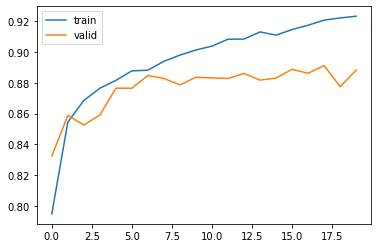

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline 

def show_history(history): 
    plt.plot(history.history['accuracy'],label = 'train')
    plt.plot(history.history['val_accuracy'],label='valid')
    plt.legend()

show_history(history)

In [11]:
model.evaluate(test_images,test_oh_labels,batch_size=256,verbose=1)

40/40 [==============================] - 0s 2ms/step - loss: 0.3411 - accuracy: 0.8825


[0.3411473035812378, 0.8824999928474426]